<a href="https://colab.research.google.com/github/ehye1/data-python/blob/main/chapter10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**10-1 대통령 연설문 텍스트 마이닝**

In [7]:
!pip install jpype1
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 51.1 MB/s eta 0:00:00


In [4]:
#연설문 불러오기
moon = open('speech_moon.txt', encoding = 'UTF-8').read()
moon

'정권교체 하겠습니다!\n  정치교체 하겠습니다!\n  시대교체 하겠습니다!\n  \n  ‘불비불명(不飛不鳴)’이라는 고사가 있습니다. 남쪽 언덕 나뭇가지에 앉아, 3년 동안 날지도 울지도 않는 새. 그러나 그 새는 한번 날면 하늘 끝까지 날고, 한번 울면 천지를 뒤흔듭니다.\n\n그 동안 정치와 거리를 둬 왔습니다. 그러나 암울한 시대가 저를 정치로 불러냈습니다. 더 이상 남쪽 나뭇가지에 머무를 수 없었습니다. 이제 저는 국민과 함께 높이 날고 크게 울겠습니다. 오늘 저는 제18대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다.\n\n\n‘우리나라 대통령’이 되겠습니다.\n\n\n존경하는 국민 여러분!\n  \n  저는 대통령이 되겠습니다. 우리나라 대통령이 되겠습니다. 소수 특권층의 나라가 아니라 보통사람들이 주인인 ‘우리나라’, 네 편 내 편 편가르지 않고 함께 가는 우리나라, ‘우리’라는 말이 조금도 부끄럽지 않은, 진정한 ‘우리나라’의 대통령이 되겠습니다.\n\n지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다. 나라의 주인으로 행세하지 못했고, 주인으로 대접받지 못했습니다. 나서서 말도 하지 못했습니다. 이제 몸을 일으켜 날아야 합니다. 당당하게 말하고 정치에 참여해야 합니다.\n\n제가 추구하는 ‘우리나라’는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다. 저는 시민과 동행하는 정치를 하고 싶습니다. 제가 추구하는 ‘우리나라’는 특권과 불평등의 나라가 아니라, 보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다.\n\n이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다. 힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제, 낡은 정치, 낡은 권력도 모두 끝났습니다. 오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다.\n\n국민이 모두 아픕니다.\n\n제가 높이 날고 크게 울겠다고 결심한 이유는 보통사람들의 삶이 너무 고달프고, 우리가 처한 현실이 너무도 엄중

In [5]:
#불필요한 문자 제거하기 (한글이 아닌 문자 -> 공백)
import re
moon = re.sub('[^가-힣]', ' ', moon)
moon

'정권교체 하겠습니다    정치교체 하겠습니다    시대교체 하겠습니다        불비불명       이라는 고사가 있습니다  남쪽 언덕 나뭇가지에 앉아   년 동안 날지도 울지도 않는 새  그러나 그 새는 한번 날면 하늘 끝까지 날고  한번 울면 천지를 뒤흔듭니다   그 동안 정치와 거리를 둬 왔습니다  그러나 암울한 시대가 저를 정치로 불러냈습니다  더 이상 남쪽 나뭇가지에 머무를 수 없었습니다  이제 저는 국민과 함께 높이 날고 크게 울겠습니다  오늘 저는 제  대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다     우리나라 대통령 이 되겠습니다    존경하는 국민 여러분       저는 대통령이 되겠습니다  우리나라 대통령이 되겠습니다  소수 특권층의 나라가 아니라 보통사람들이 주인인  우리나라   네 편 내 편 편가르지 않고 함께 가는 우리나라   우리 라는 말이 조금도 부끄럽지 않은  진정한  우리나라 의 대통령이 되겠습니다   지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다  나라의 주인으로 행세하지 못했고  주인으로 대접받지 못했습니다  나서서 말도 하지 못했습니다  이제 몸을 일으켜 날아야 합니다  당당하게 말하고 정치에 참여해야 합니다   제가 추구하는  우리나라 는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다  저는 시민과 동행하는 정치를 하고 싶습니다  제가 추구하는  우리나라 는 특권과 불평등의 나라가 아니라  보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다   이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다  힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제  낡은 정치  낡은 권력도 모두 끝났습니다  오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다   국민이 모두 아픕니다   제가 높이 날고 크게 울겠다고 결심한 이유는 보통사람들의 삶이 너무 고달프고  우리가 처한 현실이 너무도 엄중하기 때문입니다  근본적인 혁신  거대한 전

In [8]:
#명사 추출하기
import konlpy
hannanum = konlpy.tag.Hannanum()
hannanum.nouns('대한민국의 영토는 한반도와 그 부속도서로 한다')

['대한민국', '영토', '한반도', '부속도서']

In [9]:
#리스트를 데이터 프레임으로 변환
nouns = hannanum.nouns(moon)

import pandas as pd
df_word = pd.DataFrame({'word' : nouns})
df_word

,word
0,정권교체
1,정치교체
2,시대교체
3,불비불명
4,고사
...,...
1408,모두
1409,주인
1410,진정한
1411,우리나라


In [10]:
#글자 수 변수 추가
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2
...,...,...
1408,모두,2
1409,주인,2
1410,진정한,3
1411,우리나라,4


In [11]:
#두 글자 이상 단어만 남기기
df_word = df_word.query('count >= 2')
df_word.sort_values('count')

,word,count
712,국민,2
1164,가사,2
1163,숙제,2
1162,평등,2
644,확대,2
...,...,...
707,평생학습체제,6
1268,군사대결지대,6
173,성적스트레스,6
978,고용영향평가제도,8


In [12]:
#단어 빈도 구하기
df_word = df_word.groupby('word', as_index = False) \
                 .agg(n = ('word', 'count')) \
                 .sort_values('n', ascending = False)
df_word

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
...,...,...
278,북핵문제,1
279,분단,1
281,분야,1
283,분쟁,1


<Axes: xlabel='n', ylabel='word'>

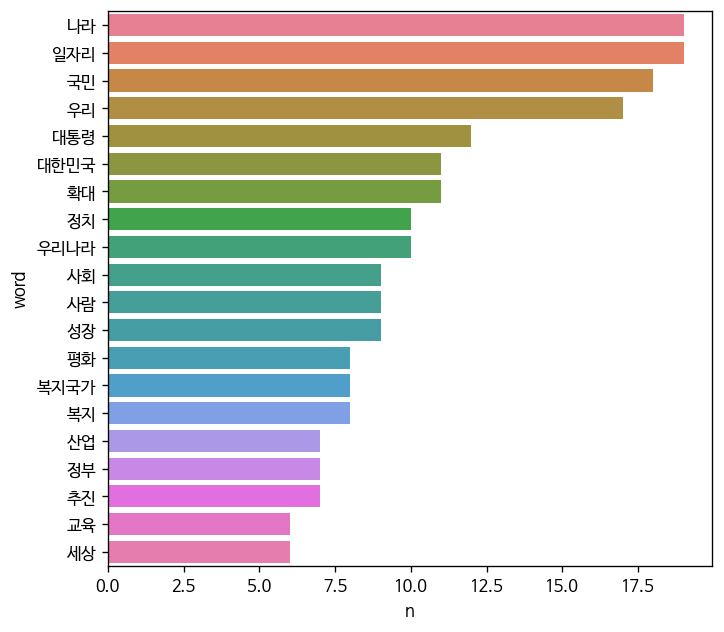

In [17]:
#단어 빈도 상위 20개 추출해서 그래프 그리기
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : 120,
                    'figure.figsize' : [6.5, 6]})
top20 = df_word.head(20)
sns.barplot(data = top20, y = 'word', x = 'n', hue = 'word')

In [19]:
#워드 클라우드 만들기
!pip install wordcloud

In [20]:
#단어(키)와 빈도(값)를 담은 딕셔너리 만들기
#데이터 프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'나라': 19,
 '일자리': 19,
 '국민': 18,
 '우리': 17,
 '대통령': 12,
 '대한민국': 11,
 '확대': 11,
 '정치': 10,
 '우리나라': 10,
 '사회': 9,
 '사람': 9,
 '성장': 9,
 '평화': 8,
 '복지국가': 8,
 '복지': 8,
 '산업': 7,
 '정부': 7,
 '추진': 7,
 '교육': 6,
 '세상': 6,
 '경쟁': 6,
 '보통사람들': 5,
 '공평': 5,
 '경제': 5,
 '대통령의': 5,
 '상생': 5,
 '정규직': 5,
 '정의': 4,
 '결과': 4,
 '사회적': 4,
 '투자': 4,
 '주인': 4,
 '전환': 4,
 '때문': 4,
 '모델': 4,
 '요구': 4,
 '희망': 4,
 '창출': 4,
 '역사': 4,
 '기회': 4,
 '여성': 4,
 '담쟁': 4,
 '강화': 4,
 '아래': 4,
 '고통': 4,
 '약자': 4,
 '아이들': 4,
 '중소기업': 4,
 '공정': 3,
 '문재인': 3,
 '특권': 3,
 '국가': 3,
 '사람들': 3,
 '노인': 3,
 '변화': 3,
 '비중': 3,
 '교육혁신': 3,
 '관계': 3,
 '질서': 3,
 '군대': 3,
 '지원': 3,
 '과도한': 3,
 '권력': 3,
 '부담': 3,
 '그것': 3,
 '지방': 3,
 '국민들': 3,
 '채택': 3,
 '소수': 3,
 '세계': 3,
 '신산업': 3,
 '시민': 3,
 '개선': 3,
 '혁신': 3,
 '혁명': 3,
 '양극화': 3,
 '원칙': 3,
 '활용': 3,
 '행복': 3,
 '원전': 3,
 '에너지': 3,
 '경제성장': 3,
 '세금': 3,
 '이명박': 3,
 '성장전략': 3,
 '가치': 3,
 '가지': 3,
 '여러분': 3,
 '강자': 3,
 '진정한': 2,
 '노동자들': 2,
 '마음속': 2,
 '노력': 2,
 '만큼': 2,
 '육성': 2,
 '모두

In [37]:
#wc 만들기
from wordcloud import WordCloud
wc = WordCloud(random_state = 1234,
               font_path = "C:/Users/82102/Desktop/font/NanumGothicBold.ttf",
               width = 400,
               height = 400,
               background_color = 'white')

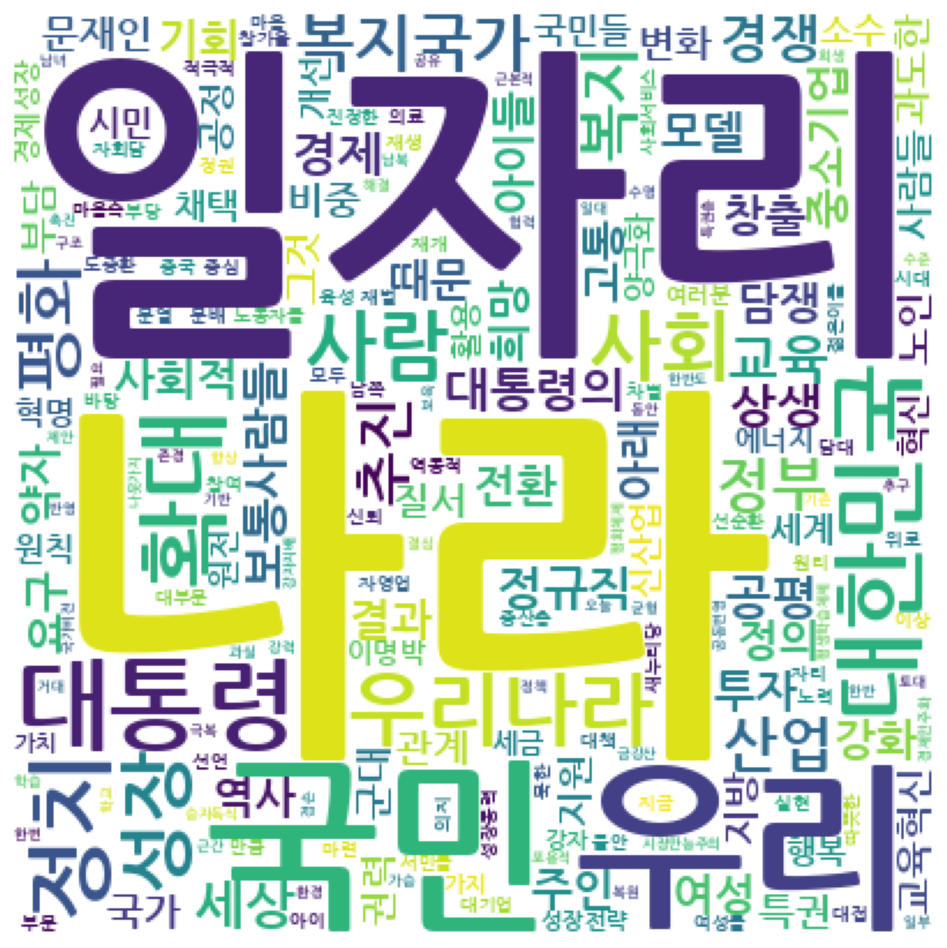

In [39]:
#워드 클라우드 출력
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10, 10))
plt.axis('off') #테두리 선 없애기
plt.imshow(img_wordcloud)

In [40]:
#워드 클라우드 모양 바꾸기
import PIL
icon = PIL.Image.open('cloud.png')

In [41]:
#mask 만들기
import numpy as np
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

In [42]:
#wc 만들기
wc = WordCloud(random_state = 1234,
               font_path = 'C:/Users/82102/Desktop/font/NanumGothicBold.ttf',
               width = 400,
               height = 400,
               background_color = 'white',
               mask = img) #mask 설정

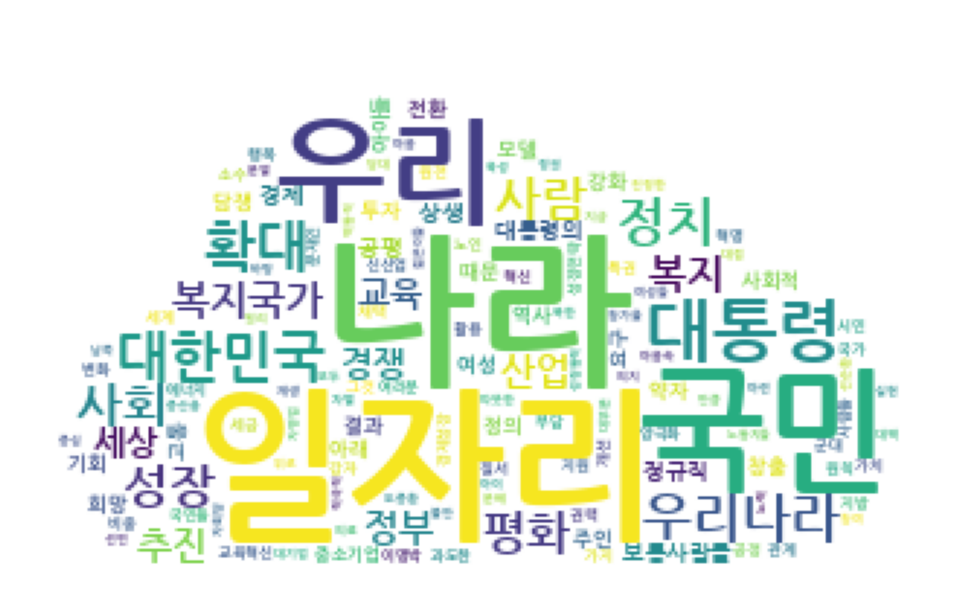

In [43]:
#워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

#워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

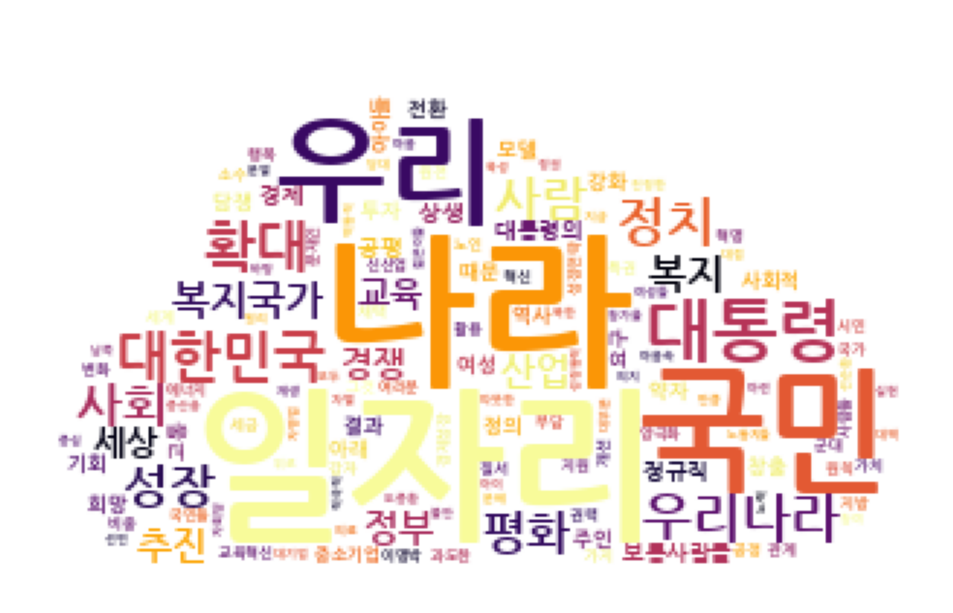

In [45]:
#워드 클라우드 색깔 바꾸기
wc = WordCloud(random_state = 1234,
               font_path = 'C:/Users/82102/Desktop/font/NanumGothicBold.ttf',
               width = 400,
               height = 400,
               background_color = 'white',
               mask = img,
               colormap = 'inferno') #컬러맵 설정

#워드 클라우드 출력
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

**10-2 기사 댓글 텍스트 마이닝**

In [47]:
#데이터 불러오기
df = pd.read_csv('news_comment_BTS.csv', encoding = 'UTF-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [48]:
#불필요한 문자 제거하기
df['reply'] = df['reply'].str.replace('[^가-힣]', ' ', regex = True)
df['reply'].head()

0                                    국보소년단            
1                                         아줌마가 들어도 좋더라
2    팩트체크  현재 빌보드           위  방탄소년단       위       ...
3              방탄소년단이 한국사람이라 너무 자랑스러워요    우리오래오래 함께하자 
4                  대단한      월드 클래스는 다르네   좋은 소식   응원해요
Name: reply, dtype: object

In [50]:
#명사 추출하기
kkma = konlpy.tag.Kkma()
nouns = df['reply'].apply(kkma.nouns)
nouns

0                                        [국보, 국보소년단, 소년단]
1                                                   [아줌마]
2                   [팩트, 팩트체크, 체크, 보드, 위, 방탄, 방탄소년단, 소년단]
3              [방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]
4                                       [월드, 클래스, 소식, 응원]
                              ...                        
1195                                                   []
1196                                      [우리, 탄, 자랑, 사랑]
1197                                              [애, 군대]
1198                                     [군, 군면제급, 면제, 급]
1199    [자랑, 축하, 김, 김남, 남, 김석진, 민, 민윤기, 윤기, 정, 정호석, 호석...
Name: reply, Length: 1200, dtype: object

In [51]:
#한 행에 한 단어만 들어가도록 구성
nouns = nouns.explode()
nouns

0          국보
0       국보소년단
0         소년단
1         아줌마
2          팩트
        ...  
1199      박지민
1199      김태형
1199        전
1199      전정국
1199       정국
Name: reply, Length: 9353, dtype: object

In [52]:
#단어 빈도표 만들기
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0
...,...,...
1199,박지,2.0
1199,박지민,3.0
1199,김태형,3.0
1199,전정국,3.0


<Axes: xlabel='count', ylabel='word'>

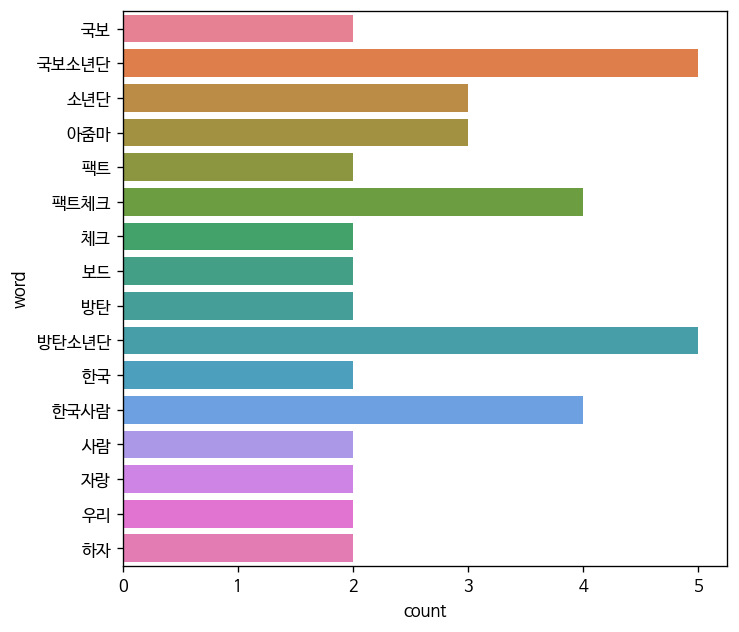

In [58]:
#단어 빈도 막대 그래프
top20 = df_word.head(20)

plt.rcParams.update({'figure.figsize' : [6.5, 6]})
sns.barplot(data = top20, y = 'word', x = 'count', hue = 'word')

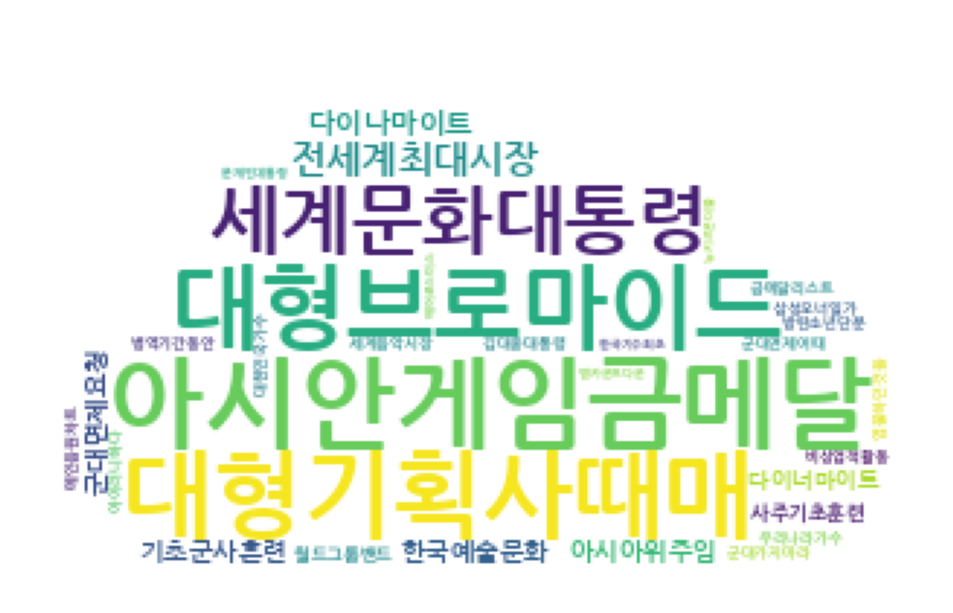

In [61]:
#워드 클라우드 만들기
dic_word = df_word.set_index('word').to_dict()['count']
wc = WordCloud(random_state = 1234,
               font_path = 'C:/Users/82102/Desktop/font/NanumGothicBold.ttf',
               width = 400,
               height = 400,
               background_color = 'white',
               mask = img)
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)